<a href="https://colab.research.google.com/github/Dhokaikomal/BankChurnPrediction/blob/main/Bank_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




## **Project Title:Bank Customer Churn Prediction**



## **About this Project:**

This is EDA project using Python Implementation

Customer churn is the percentage of customers that stopped using bank's product or service during a certain time frame.

# **Key Steps:**
1.Importing Necessary Packages
2.Statistical Summary of the Dataset  
3.Dropping Irrelevant Features                  
4.Data Visualization                                         
5.Detecting Outliers using Tukey Boxplot                         
6.Checking Correlation with Heatmap

# **Attribute Information:**

1.RowNumber—corresponds to the record (row) number and has no effect on
CustomerId—contains random values and has no effect on customer leaving the bank.

2.Surname—the surname of a customer has no impact on their decision to leave the bank.

3.CreditScore—can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.

4.Geography—a customer’s location can affect their decision to leave the bank.

5.Gender—it’s interesting to explore whether gender plays a role in a customer leaving the bank.

6.Age—this is certainly relevant, since older customers are less likely to leave their bank than younger ones.

7.Tenure—refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.

8.Balance—also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.

9.NumOfProducts—refers to the number of products that a customer has purchased through the bank.

10.HasCrCard—denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.

11.IsActiveMember—active customers are less likely to leave the bank.

12.EstimatedSalary—as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.

13.Exited—whether or not the customer left the bank.

In [10]:
#Import Necessary Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# read dataset
df=pd.read_csv("churn.csv")

In [12]:
# first five row of the dataset
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [13]:
# last five row of the dataset
df.tail()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [14]:
# row and column of data
df.shape

(10000, 14)

In [15]:
# check all column name
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [16]:
# infromation of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [17]:
# describe the data with different statistical terms
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [18]:
#check null value
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [19]:
# check unique value
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [20]:
#drop Irrelevant feature that not effect to the bank customer churn
df_new=df.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [21]:
# make new dataframe
df_new

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# **Data visulization**
Distribution of cetegorical features

In [22]:
df_new.describe(include = ['object'])

,Geography,Gender
count,10000,10000
unique,3,2
top,France,Male
freq,5014,5457


In [23]:
#unique value of column Geography
df_new['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [24]:
#count unique value of Geography
df_new['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [25]:
import plotly.express as px #for better visulization we imoprt ploty.express

In [26]:
# column Geography wise count number of customer
fig1=px.histogram(df_new,x='Geography',color='Geography') 
fig1.show()

France have more customer compare to other country

In [27]:
#unique value of column Gender
df_new['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [28]:
#count unique value of Gender
df_new['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [29]:
#column Gender according count number of customer
fig2=px.histogram(df_new,x='Gender',color='Gender')   
fig2.show()

Female customer less as compare to male

Distribution on numeric feature

In [30]:
df_new.describe(exclude=['object'])

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [31]:
#unique value of IsActiveMember
df_new['IsActiveMember'].unique()

array([1, 0])

In [32]:
#count unique value of column IsActiveMember
df_new['IsActiveMember'].value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

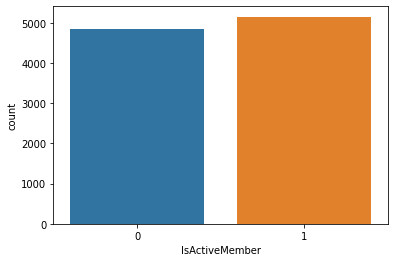

In [33]:
#Active Customer in Bank
sns.countplot(x='IsActiveMember',data=df_new)

In [34]:
#unique value of Exited
df_new['Exited'].unique()

array([1, 0])

In [35]:
#count unique value of Exited
df_new['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [36]:
#Existed customer in bank
fig3=px.histogram(df_new,x='Exited',color='Exited') 
fig3.show()

In [37]:
#Age accourding we see exited customer in bank
fig5=px.histogram(df_new,x='Age',y='Exited',color='Age') 
fig5.show()

In [38]:
#pie chart visualization of exited customer
values=df_new['Exited'].value_counts()
names=['Retained','Exited']
fig6=px.pie(values=values,names=names)
fig6


Compare to Retained people exited people less

In [39]:
df_new.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [40]:
#numeric column of the dataset
df_new_numeric=df_new[['CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited']]
df_new_numeric

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,0.00,1,1,1,101348.88,1
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,1
3,699,39,1,0.00,2,0,0,93826.63,0
4,850,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0
9996,516,35,10,57369.61,1,1,1,101699.77,0
9997,709,36,7,0.00,1,0,1,42085.58,1
9998,772,42,3,75075.31,2,1,0,92888.52,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



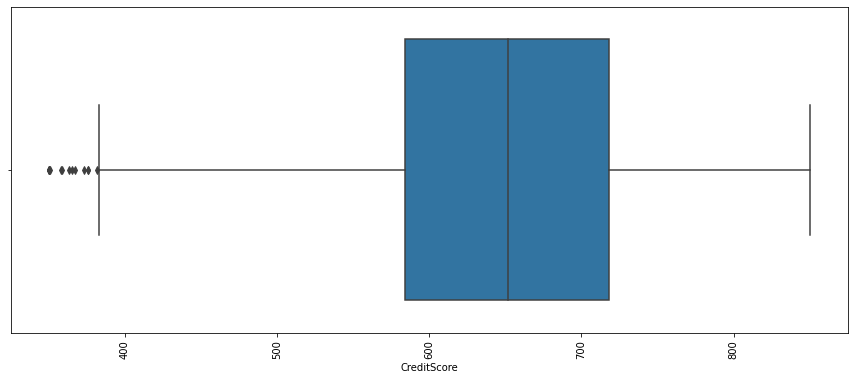

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



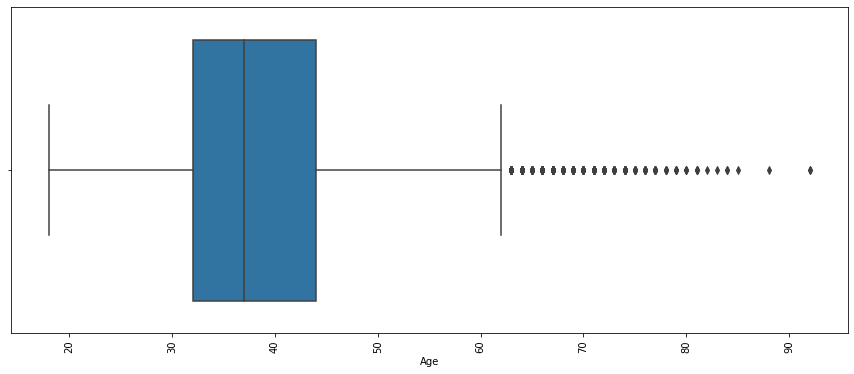

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



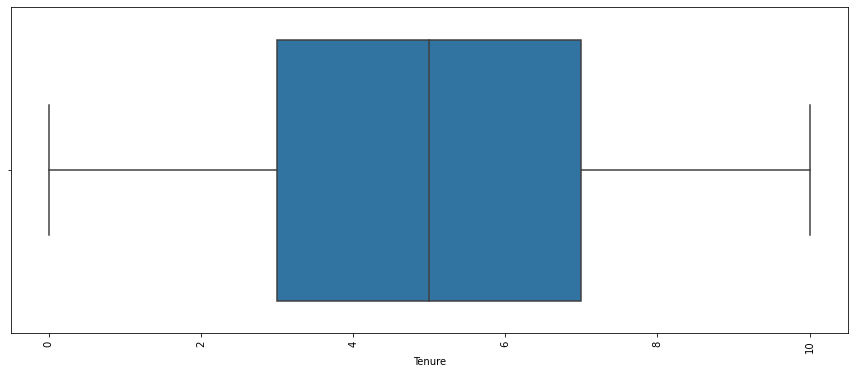

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



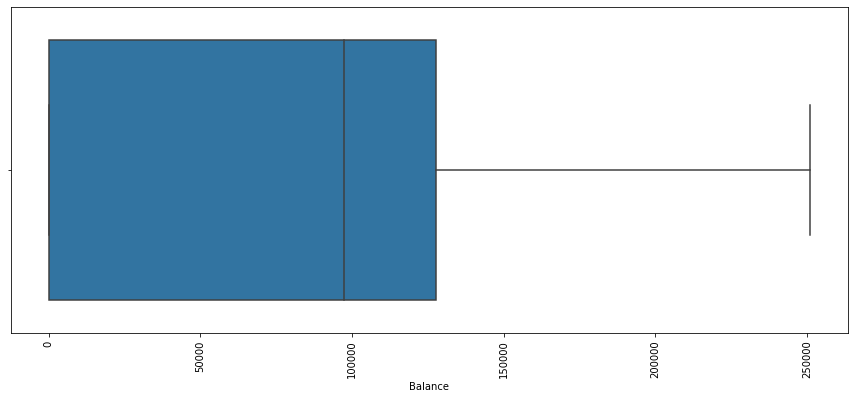

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



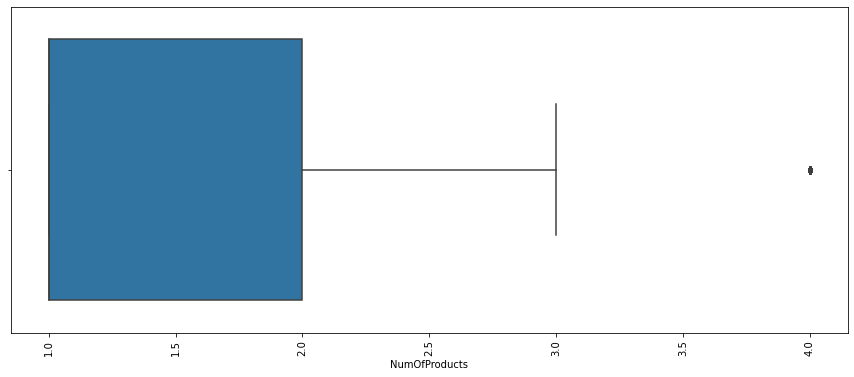

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



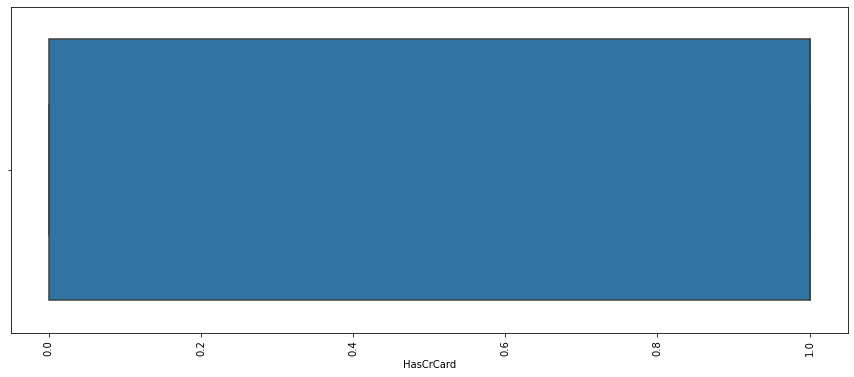

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



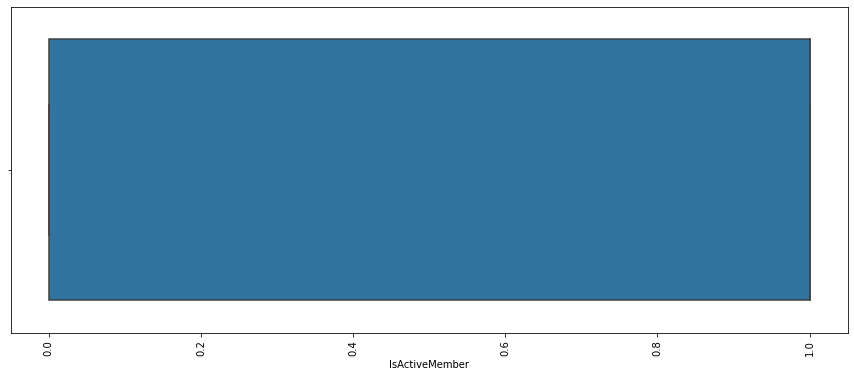

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



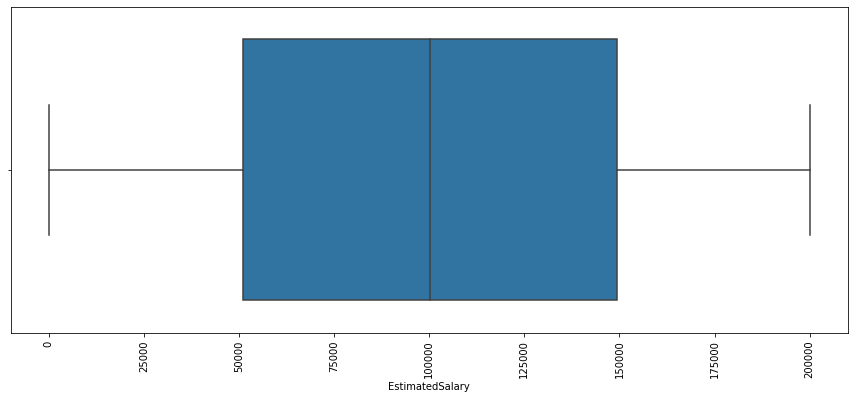

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



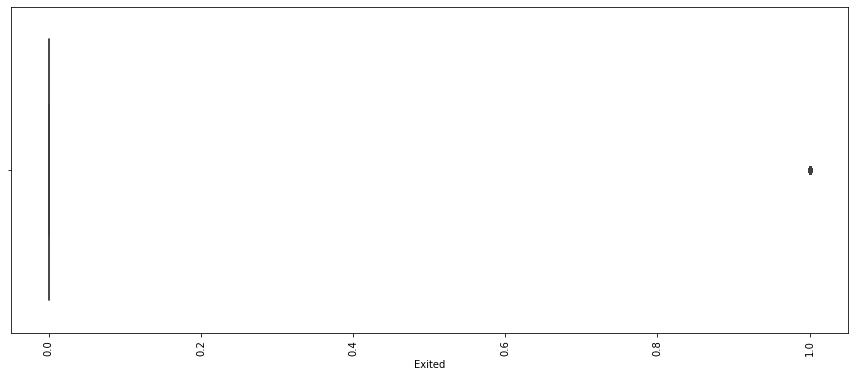

In [41]:
# boxplot of all numeric column
for i in df_new_numeric.columns:
  plt.figure(figsize=(15,6))   
  sns.boxplot(df_new_numeric[i],data=df_new_numeric)
  plt.xticks(rotation=90)
  plt.show()

Number of Products, IsActiveMember, Credit cards& score,salary has no Significant effect on the likelihood to churn.

The older customers are churning at more than the younger ones.

With regards to the tenure, the clients on either extreme end (spent little time with the bank or a lot of time with the bank) are more likely to churn compared to those that are of average tenure.

The bank is losing customers with significant bank balances.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



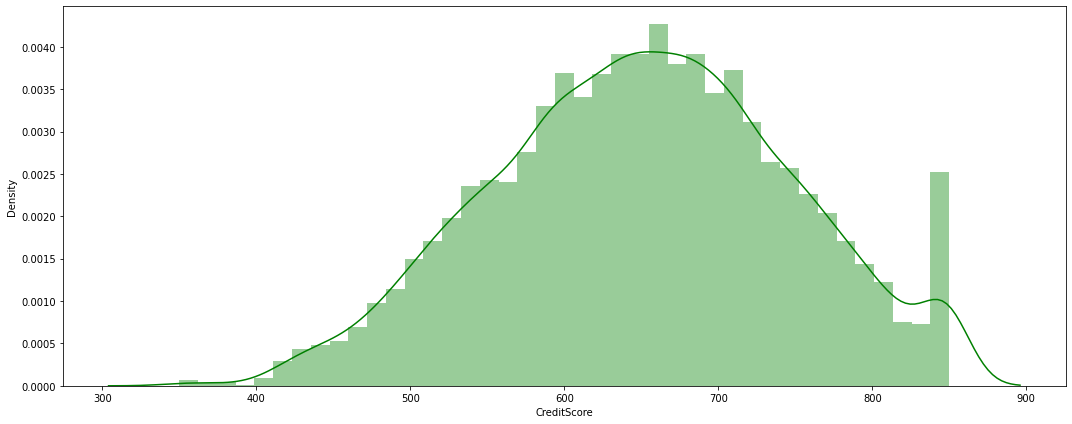

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



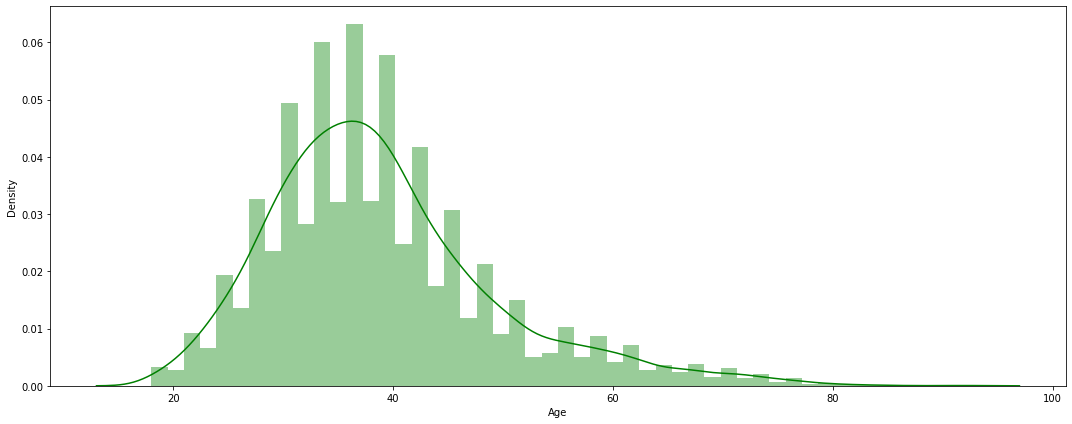

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



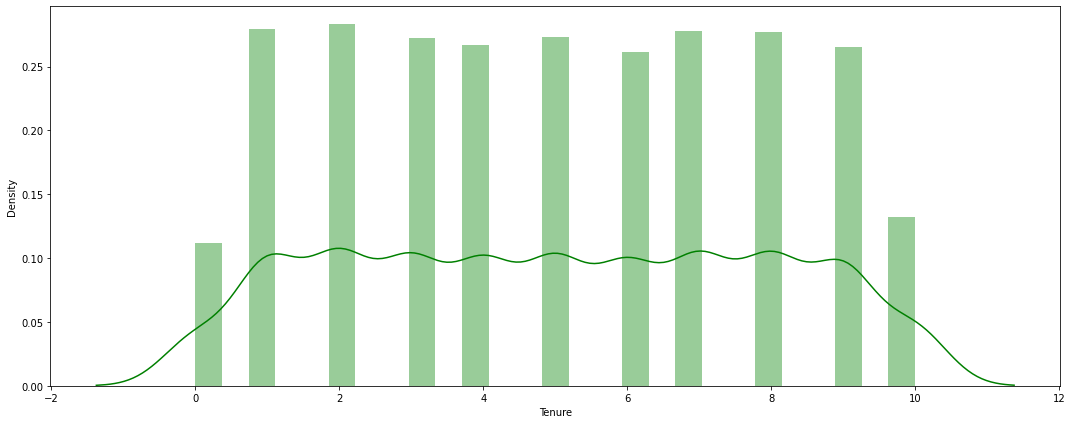

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



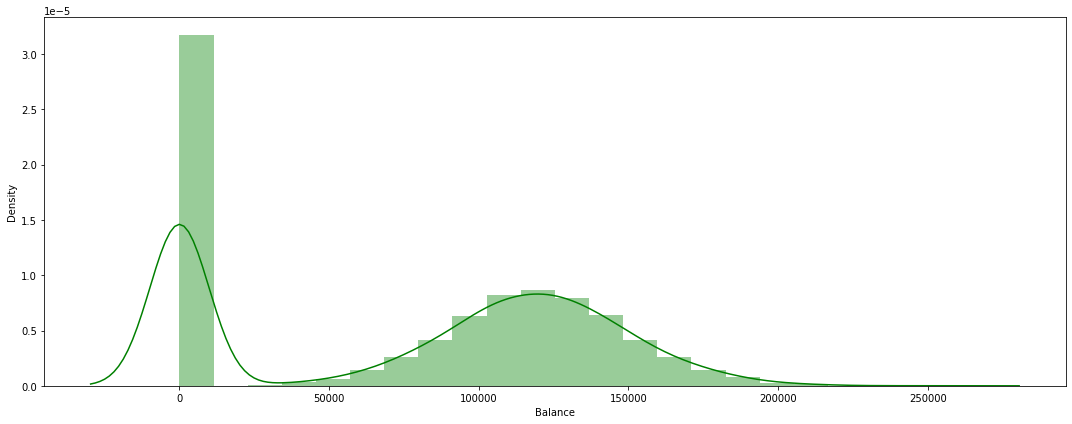

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



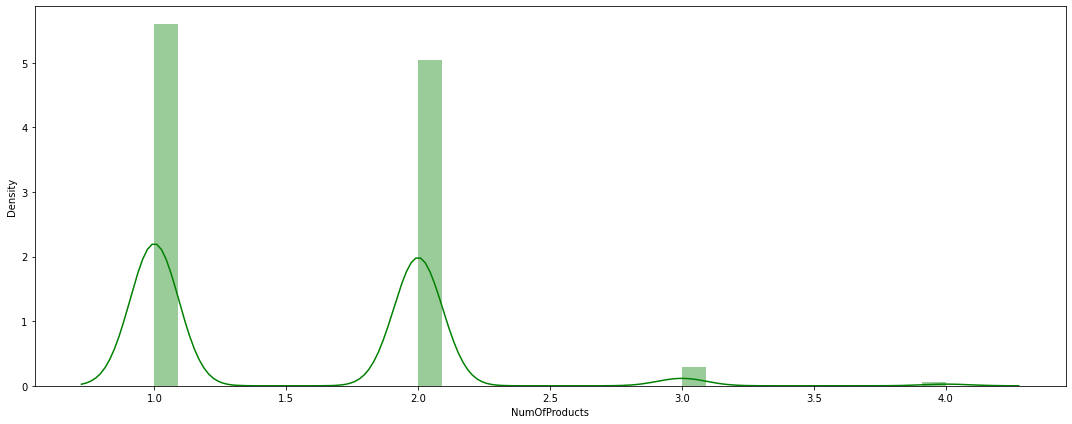

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



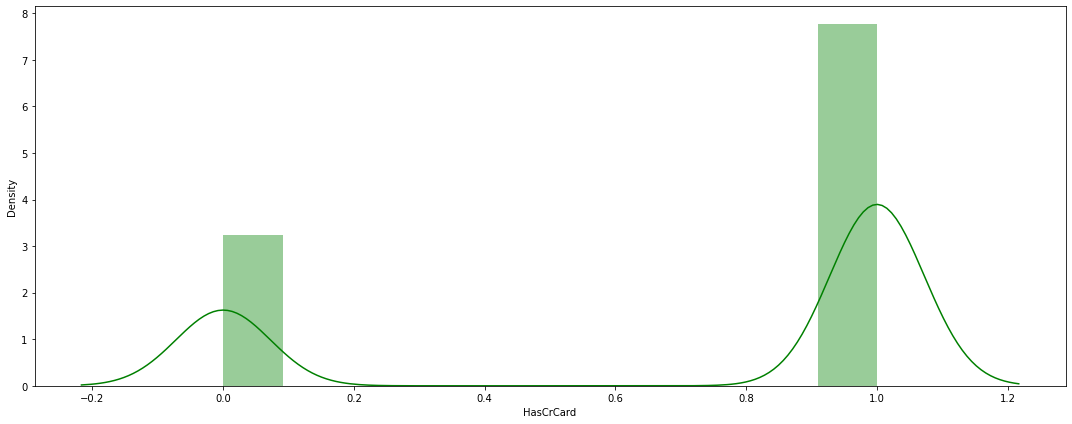

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



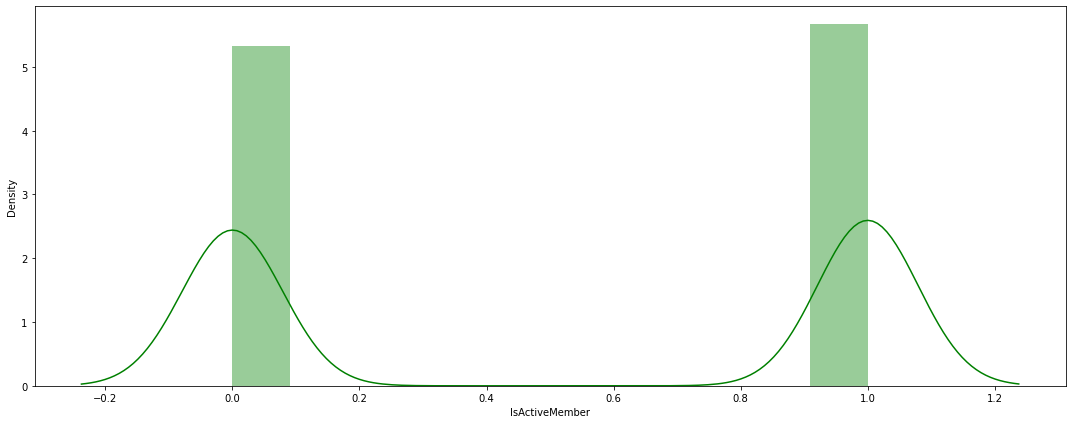

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



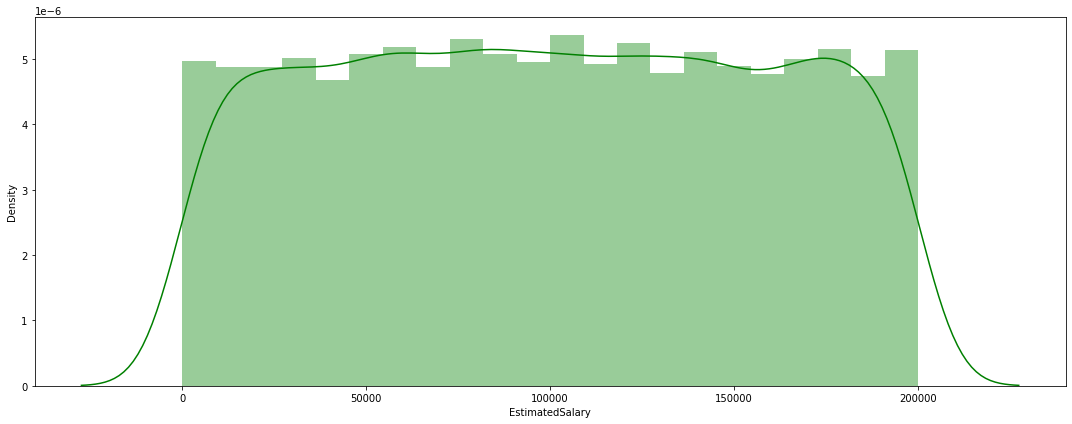

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



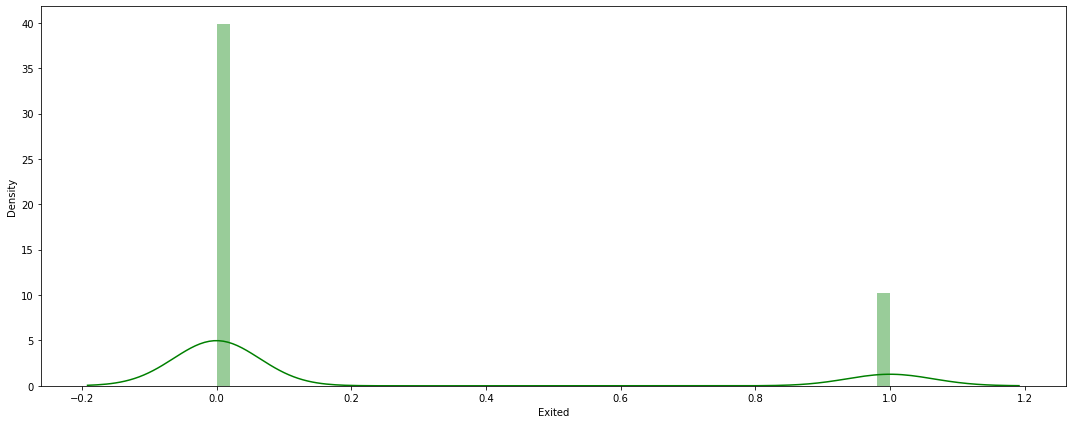

In [42]:
#visualization with distplot of numeric column
#mean<median<mode->Negative skewed
#mean=median-mode->symmetric skewed
#mean>meduan>mode->Positive skewed
for i in df_new_numeric.columns:
     plt.figure(figsize=(15,6))  
     sns.distplot(df_new_numeric[i],color='green')
     plt.tight_layout()
     plt.show()

CreditScore-Negative skewed i.e. credit score go to negative side high chance to customer exited

Age-Positive skewed i.e. mostly old age people not exited to the bank and 30-40 age year people retained to the bank

Tenure-Positive skewed i.e older clients are more loyal and less likely to leave a bank

Balance-Positive skewed i.e. people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances

EstimatedSalary-Positive skewed i.e. people with lower salaries are more likely to leave the bank compared to those with higher salaries

In [43]:
#drop target column
df_exited=df_new.drop(columns='Exited')

In [44]:
df_exited.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



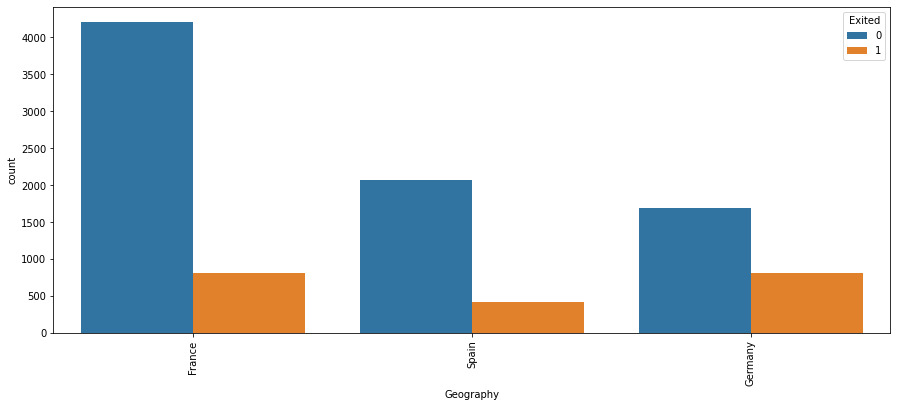

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



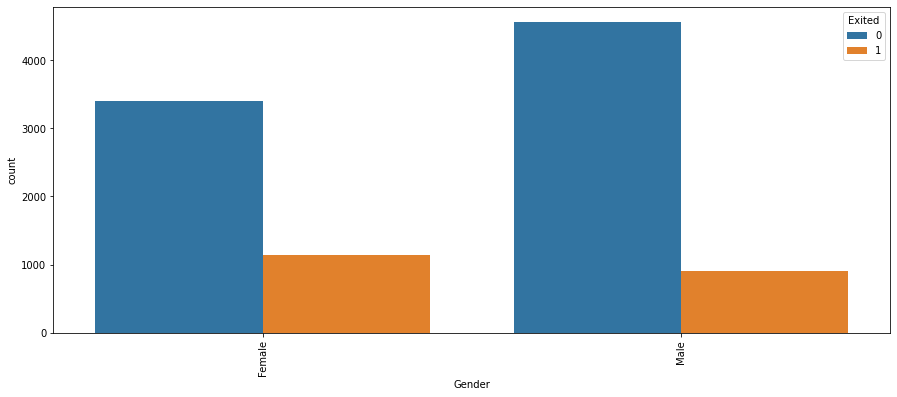

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



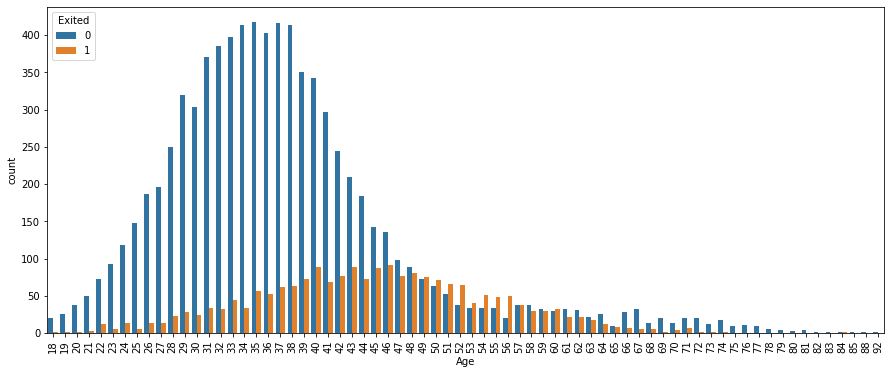

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



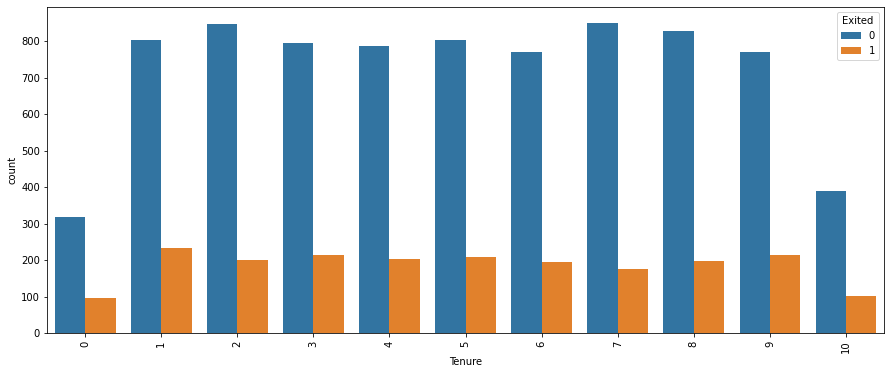

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



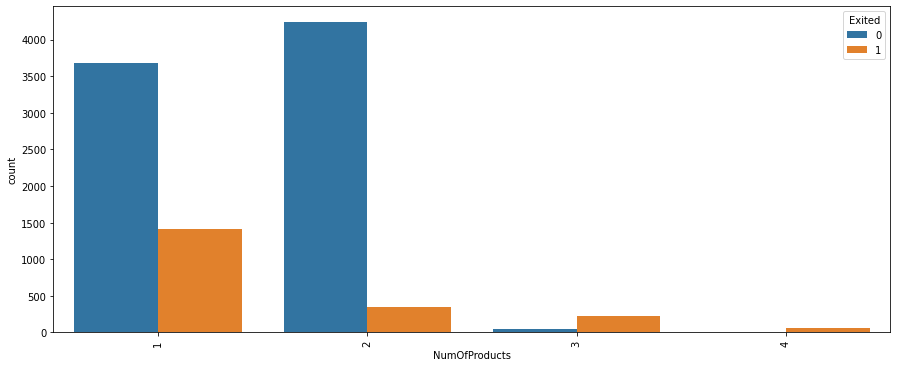

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



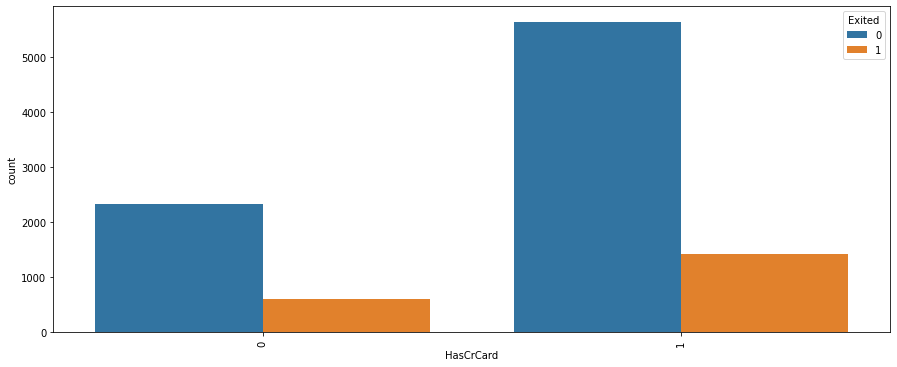

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



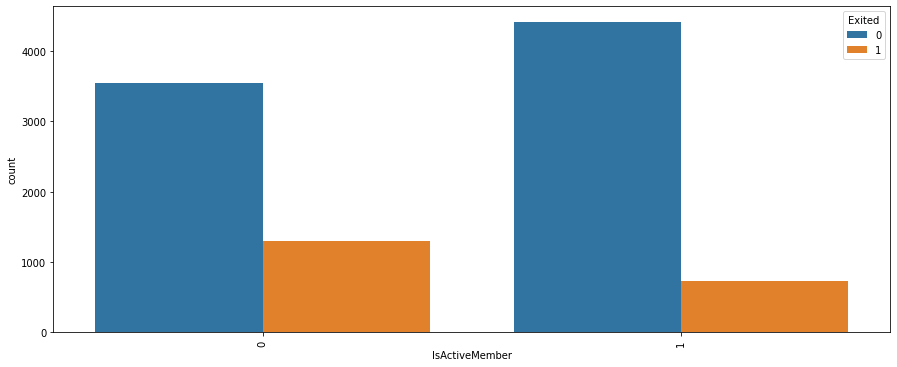

In [45]:
#Segment "Exited" by gender,geography,age,tenure,numberproduct,hashcard,isactivemember and display the frequency within each class:

for i in df_exited[[ 'Geography', 'Gender', 'Age', 'Tenure',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember']]:
        plt.figure(figsize=(15,6))
        sns.countplot(df_exited[i],hue='Exited',data=df_new_numeric)
        plt.xticks(rotation=90)
        plt.show()

In [46]:
#correlation of numeric data
df_new_numeric.corr()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


Weak positive correlation with age
Very weak positive correlation with balance
Very weak negative correlations with number of products and IsActiveMember

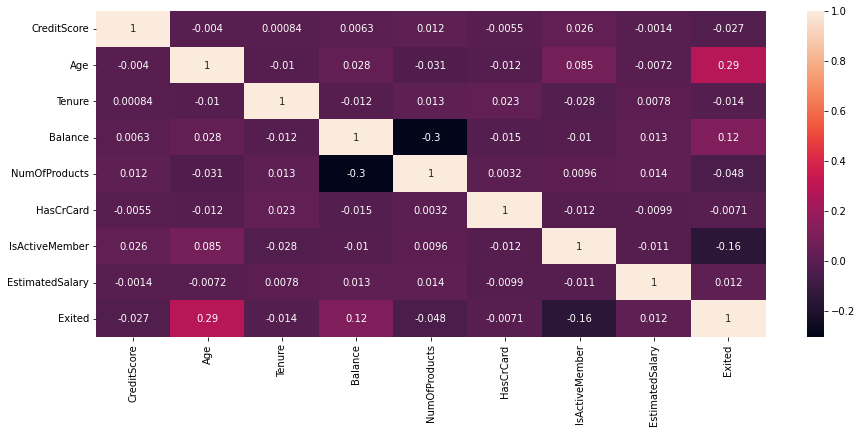

In [47]:
#Heatmap to check correlation 
plt.figure(figsize=(15,6))
sns.heatmap(df_new_numeric.corr(),annot=True)
plt.show()

In [48]:
# we give range in age and divide into 6 interval
df_new['age_groups']=pd.cut(df_new['Age'],bins=6)

In [49]:
df_new['age_groups']

0       (30.333, 42.667]
1       (30.333, 42.667]
2       (30.333, 42.667]
3       (30.333, 42.667]
4         (42.667, 55.0]
              ...       
9995    (30.333, 42.667]
9996    (30.333, 42.667]
9997    (30.333, 42.667]
9998    (30.333, 42.667]
9999    (17.926, 30.333]
Name: age_groups, Length: 10000, dtype: category
Categories (6, interval[float64, right]): [(17.926, 30.333] < (30.333, 42.667] < (42.667, 55.0] <
                                           (55.0, 67.333] < (67.333, 79.667] < (79.667, 92.0]]

In [50]:
#copy the dataframe
df_new_age=df_new.copy()

In [51]:
# merge the column of age_groups,exited and count gender as user_count column
df_new_age=df_new_age.groupby(['age_groups','Exited']).agg({'Gender':'count'}).reset_index()
df_new_age.columns=['age_groups','Exited','user_count']
df_new_age['Exited']=df_new_age['Exited'].apply(lambda x:'Exited' if x==1 else 'Retained')

In [52]:
df_new_age

,age_groups,Exited,user_count
0,"(17.926, 30.333]",Retained,1820
1,"(17.926, 30.333]",Exited,148
2,"(30.333, 42.667]",Retained,4454
3,"(30.333, 42.667]",Exited,684
4,"(42.667, 55.0]",Retained,1183
5,"(42.667, 55.0]",Exited,911
6,"(55.0, 67.333]",Retained,337
7,"(55.0, 67.333]",Exited,271
8,"(67.333, 79.667]",Retained,155
9,"(67.333, 79.667]",Exited,22


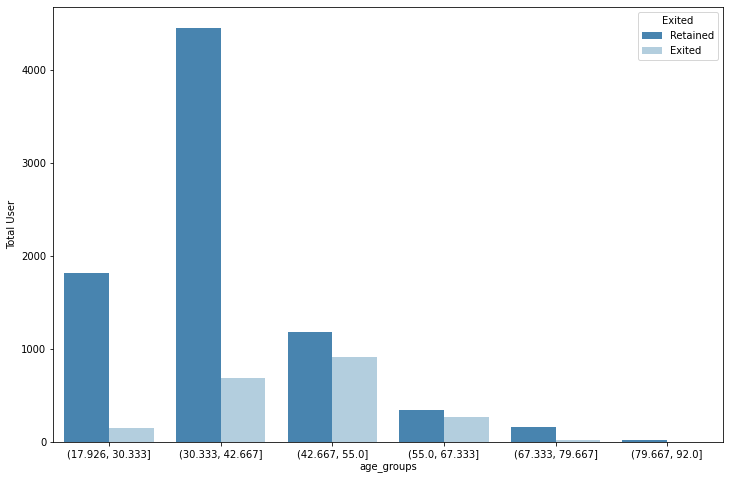

In [66]:
#visualization of age_group vs user_count
plt.figure(figsize=(12,8))
sns.barplot(data=df_new_age,x='age_groups',y='user_count',hue='Exited',palette='Blues_r')
plt.ylabel('Total User')
plt.show()


In [54]:
# merge the column of Geography,exited and count gender as user_count column 
df_new_geo=df_new.groupby(['Geography','Exited']).agg({'Gender':'count'}).reset_index()
df_new_geo.columns=['Geography','Exited','user_count']
df_new_geo

,Geography,Exited,user_count
0,France,0,4204
1,France,1,810
2,Germany,0,1695
3,Germany,1,814
4,Spain,0,2064
5,Spain,1,413


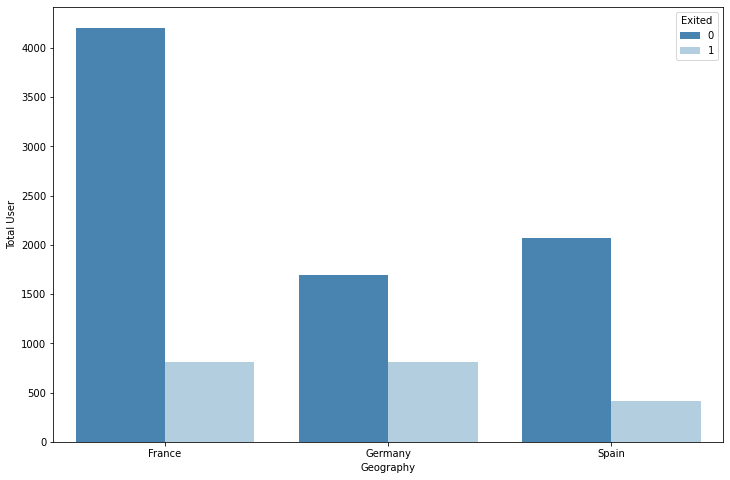

In [65]:
#visualization of column Geography vs user_count
plt.figure(figsize=(12,8))
sns.barplot(data=df_new_geo,x='Geography',y='user_count',hue='Exited',palette='Blues_r')
plt.ylabel('Total User')
plt.show()

In [56]:
# merge the column of NumOfProducts,exited and count gender as user_count column 
df_new_product=df_new.groupby(['NumOfProducts','Exited']).agg({'Gender':'count'}).reset_index()
df_new_product.columns=['NumOfProducts','Exited','user_count']
df_new_product


,NumOfProducts,Exited,user_count
0,1,0,3675
1,1,1,1409
2,2,0,4242
3,2,1,348
4,3,0,46
5,3,1,220
6,4,1,60


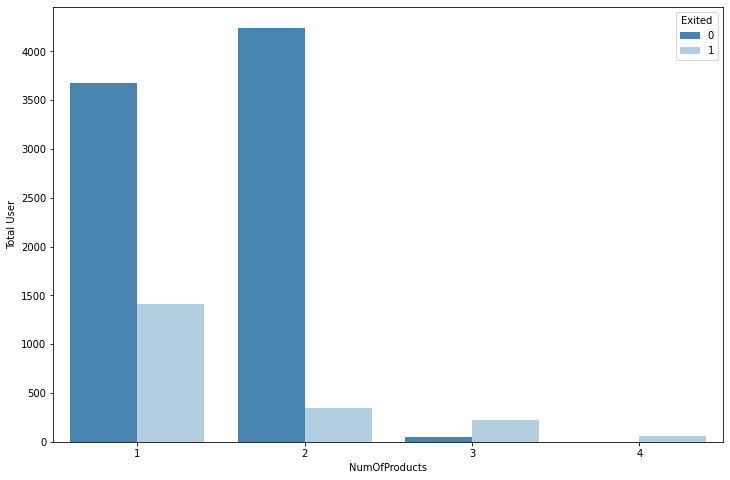

In [64]:
#visualization of NumOfProducts vs user_count
plt.figure(figsize=(12,8))
sns.barplot(data=df_new_product,x='NumOfProducts',y='user_count',hue='Exited',palette='Blues_r')
plt.ylabel('Total User')
plt.show()

In [58]:
#add new column to dataframe
df_new['CreditScoreNew']=pd.cut(df_new['CreditScore'],bins=6)

In [59]:
df_new.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,age_groups,CreditScoreNew
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,"(30.333, 42.667]","(600.0, 683.333]"
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,"(30.333, 42.667]","(600.0, 683.333]"
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,"(30.333, 42.667]","(433.333, 516.667]"
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,"(30.333, 42.667]","(683.333, 766.667]"
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,"(42.667, 55.0]","(766.667, 850.0]"


In [60]:
#merge the column of CreditScoreNew,exited and count gender as user_count column 
df_new_creditscore=df_new.groupby(['CreditScoreNew','Exited']).agg({'Gender':'count'}).reset_index()
df_new_creditscore.columns=['CreditScoreNew','Exited','user_count']
df_new_creditscore

,CreditScoreNew,Exited,user_count
0,"(349.5, 433.333]",0,67
1,"(349.5, 433.333]",1,40
2,"(433.333, 516.667]",0,640
3,"(433.333, 516.667]",1,162
4,"(516.667, 600.0]",0,1694
5,"(516.667, 600.0]",1,463
6,"(600.0, 683.333]",0,2560
7,"(600.0, 683.333]",1,633
8,"(683.333, 766.667]",0,2013
9,"(683.333, 766.667]",1,496


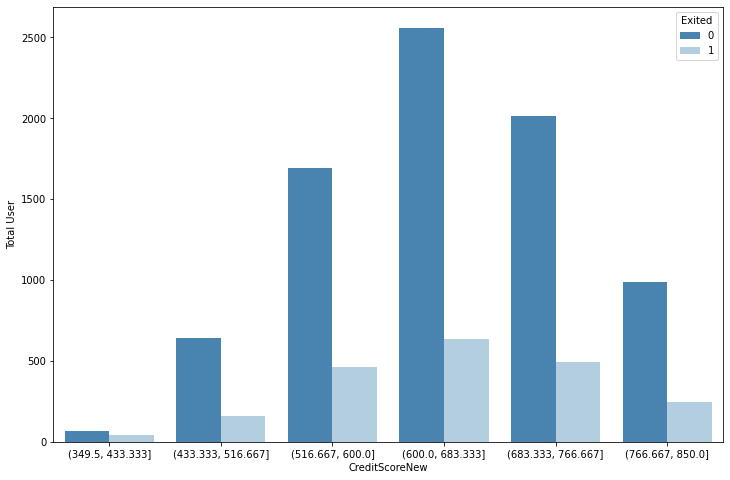

In [63]:
#visualization of CreditScoreNew vs user_count
plt.figure(figsize=(12,8))
sns.barplot(data=df_new_creditscore,x='CreditScoreNew',y='user_count',hue='Exited',palette='Blues_r')
plt.ylabel('Total User')
plt.show()